In [1]:
# Fiting the model on our data and use it to make predictions
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

Three ways to evaluate Scikit-Learn models/estimators:

    1. Estimator's Built in Score Method
    2. The 'scoring' parameter
    3. Problem Specific metric function


In [2]:
from sklearn.model_selection import cross_val_score


from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# housing; # gets downloaded as dictionary
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])



X = housing_df.drop('target',axis=1)
y = housing_df['target']




X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# create random forest model
model = RandomForestRegressor()
model.fit(X_train,y_train)

# check the score of model
model.score(X_test,y_test)

0.8040392540849098

In [3]:
cross_val_score(model,X,y,cv=4)

array([0.56332508, 0.74810279, 0.63540934, 0.61464457])

In [4]:
# can we take an average of these scores shown as the output above
import pandas as pd

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
hd = pd.read_csv('heart-disease.csv')

X = hd.drop('target',axis=1)
y = hd['target']
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y,cv=5)


In [6]:
np.mean(cross_val_score)

0.8248087431693989

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn.metrics import roc_curve

In [9]:
# Make predictions with probabilites 
clf.fit(X_train,y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [10]:
y_probs_positive = y_probs[:,1]


In [11]:
fpr, tpr, threshold = roc_curve(y_test,y_probs_positive)

In [12]:
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [13]:
# create a function to plot roc curves

In [14]:
import matplotlib.pyplot as plt

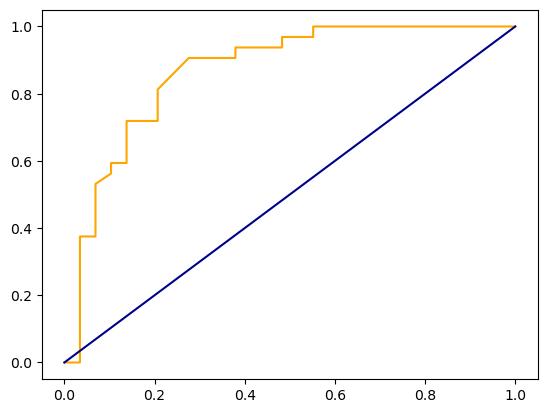

In [15]:
def plot_fp(fpr, tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',ls='-')
    plt.show()

plot_fp(fpr,tpr)

In [16]:
from sklearn.metrics import roc_auc_score

In [17]:
roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

In [18]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [19]:
# visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds,rownames=['Actual Labels'],colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [21]:
pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 932.1 kB/s eta 0:00:00 0:00:01m
Note: you may need to restart the kernel to use updated packages.


<Axes: >

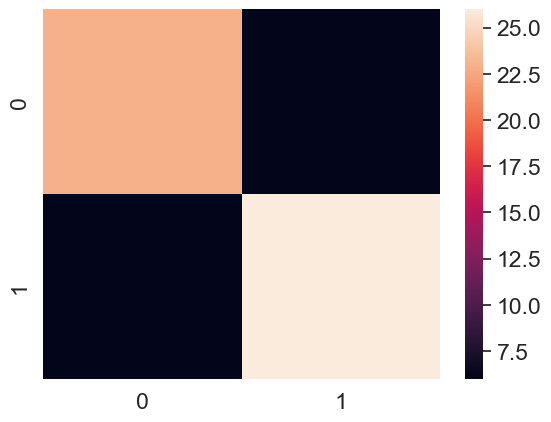

In [20]:
import seaborn as sns
# visualising confusion matrix using seaborn

# setting up the font
sns.set(font_scale=1.5)
conmatrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conmatrix)


In [21]:
import sys
# to install any package inside the environment just copy the same syntax and change the package name
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/urwah/Desktop/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.13.2             |  py312hecd8cb5_0         714 KB
    ------------------------------------------------------------
                                           Total:         714 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-64::seaborn-0.13.2-py312hecd8cb5_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


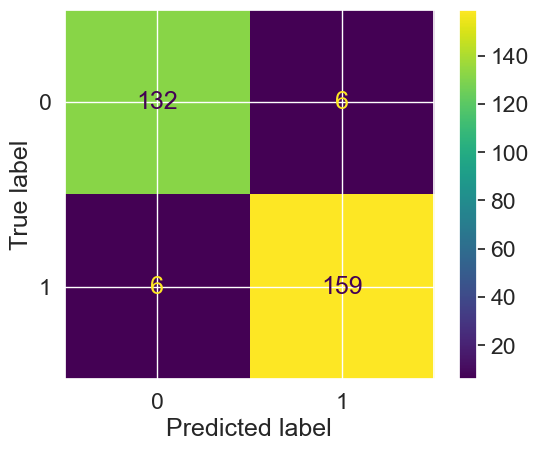

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])


In [27]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop('target',axis = 1)
y = housing['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor()

In [28]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean() )

In [29]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [30]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [31]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.3265721842781009

In [33]:
df = pd.DataFrame(data= {"Actual Values": y_test, "Predicted Values":y_preds})
df['Differences'] = df['Predicted Values'] - df['Actual Values']
df

,Actual Values,Predicted Values,Differences
0,0.47700,0.493840,0.016840
1,0.45800,0.754940,0.296940
2,5.00001,4.928596,-0.071414
3,2.18600,2.540290,0.354290
4,2.78000,2.331760,-0.448240
...,...,...,...
4123,2.63300,2.220380,-0.412620
4124,2.66800,1.947760,-0.720240
4125,5.00001,4.836378,-0.163632
4126,0.72300,0.717820,-0.005180


In [34]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534073069137548

In [36]:
from sklearn.model_selection import cross_val_score 
hd = pd.read_csv('heart-disease.csv')

In [37]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = hd.drop('target',axis=1)
y = hd['target']
clf = RandomForestClassifier()
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# create the data
X = hd.drop('target',axis=1)
y = hd['target']
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# create the model
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)

print('Classifier Metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test,y_preds)*100:.2f}%')
print(f'Recall: {recall_score(y_test,y_preds)*100:.2f}%')
print(f'F1-Score: {f1_score(y_test,y_preds)*100:.2f}%')


Classifier Metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1-Score: 86.15%


In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params() # all the hyperparameters that we want to adjust

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}